In [ ]:
#Data Source 
#https://www.kaggle.com/datasets/andreazzini/international-airline-passengers

In [1]:
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding,GRU,Bidirectional

from keras.utils import to_categorical

import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf


In [53]:
df = pd.read_csv("Downloads/air.csv",delimiter=',',encoding='latin-1')
df.head()

,Month,numb_pass
0,1949-01,112.0
1,1949-02,118.0
2,1949-03,132.0
3,1949-04,129.0
4,1949-05,121.0


In [ ]:
#in this task we want to predict the number of for passengers of the next month using the number of passengers of the last month
#so we only need the second column that contains the number and we will use it as the features and labels at the same time 

In [54]:
df=df.drop(['Month'],axis=1)
data1=df.astype('float32')

In [10]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
data=scaler.fit_transform(data1)

In [11]:
labels=np.array(data[1:])
data=np.array(data[:-1])

In [12]:
import math
n_train=math.floor(len(data)*(1-0.33))
train = data[:n_train]
train_lab = labels[:n_train]
test = data[n_train:]
test_lab = labels[n_train:]

In [29]:
train1=train.reshape(train.shape[0],train.shape[1],1) 
test1=test.reshape(test.shape[0],test.shape[1],1)

In [36]:
from keras.models import Sequential 
modelLSTM= Sequential()
modelLSTM.add(LSTM(5,input_shape=(1,1)))
modelLSTM.add(Dense(1,activation='sigmoid'))
modelLSTM.compile(loss= 'mean_squared_error',metrics='mae',optimizer='adam')
historyLSTM=modelLSTM.fit(train1,train_lab,epochs=100,validation_split=0.2)

Epoch 1/100
3/3 [==============================] - 2s 208ms/step - loss: 0.1223 - mae: 0.3362 - val_loss: 0.0157 - val_mae: 0.1095
Epoch 2/100
3/3 [==============================] - 0s 19ms/step - loss: 0.1213 - mae: 0.3347 - val_loss: 0.0154 - val_mae: 0.1082
Epoch 3/100
3/3 [==============================] - 0s 16ms/step - loss: 0.1203 - mae: 0.3331 - val_loss: 0.0151 - val_mae: 0.1070
Epoch 4/100
3/3 [==============================] - 0s 18ms/step - loss: 0.1193 - mae: 0.3316 - val_loss: 0.0148 - val_mae: 0.1060
Epoch 5/100
3/3 [==============================] - 0s 16ms/step - loss: 0.1183 - mae: 0.3301 - val_loss: 0.0145 - val_mae: 0.1050
Epoch 6/100
3/3 [==============================] - 0s 18ms/step - loss: 0.1173 - mae: 0.3286 - val_loss: 0.0142 - val_mae: 0.1039
Epoch 7/100
3/3 [==============================] - 0s 33ms/step - loss: 0.1163 - mae: 0.3270 - val_loss: 0.0139 - val_mae: 0.1029
Epoch 8/100
3/3 [==============================] - 0s 19ms/step - loss: 0.1154 - mae: 0.3

In [37]:
pred_train=modelLSTM.predict(train1)
pred_test=modelLSTM.predict(test1)

2/2 [==============================] - 0s 3ms/step


In [41]:
pred_train_inv=scaler.inverse_transform(pred_train)
pred_test_inv=scaler.inverse_transform(pred_test)

C:\Users\Maalaoui\AppData\Local\Temp\ipykernel_4544\363371166.py:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(131)


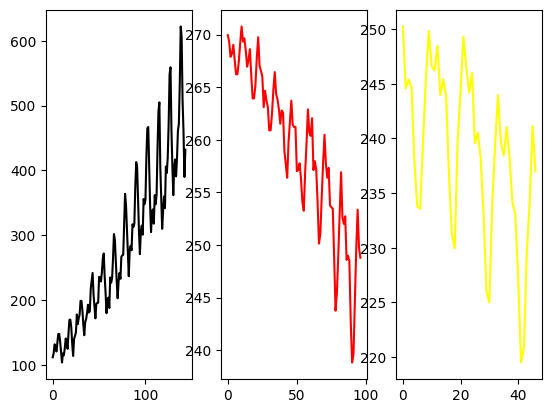

In [55]:
import matplotlib.pyplot as plt
plt.title('forcasting')
plt.subplot(131)
plt.plot(data1,color='black')
plt.subplot(132)
plt.plot(pred_train_inv,color='red')
plt.subplot(133)
plt.plot(pred_test_inv,color='yellow')